In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2 , f_classif 
from sklearn import metrics


In [2]:
df=pd.read_csv('D:\\MATERIALS\\projects\\aml\\marriage_proposal.csv')
df.head(10)

,Height,Age,Income,RomanticGestureScore,CompatibilityScore,CommunicationScore,DistanceKM,AgeCategory,Response
0,156,59,7977,3,1,1,45,Senior,1
1,169,32,5842,0,1,5,46,Middle-aged,1
2,178,42,17638,2,5,5,13,Middle-aged,0
3,164,78,8793,0,0,7,52,Senior,0
4,160,35,15262,6,0,0,9,Middle-aged,1
5,157,49,6659,0,1,6,57,Middle-aged,0
6,178,80,13789,10,3,6,69,Senior,0
7,170,23,10162,3,1,8,43,Young,1
8,156,59,15705,0,3,3,7,Senior,0
9,175,35,17327,1,2,6,44,Middle-aged,0


In [3]:
print("dataset length :" ,len(df))
df.shape


dataset length : 10000


(10000, 9)

In [4]:
X = df.drop(columns=['Response'], axis=1)
y = df[['Response']]

X.shape, y.shape

((10000, 8), (10000, 1))

In [5]:
"""""
from sklearn.preprocessing import MinMaxScaler
 #Intializing a scaler to scale our numreic data
scaler = MinMaxScaler()
# Scaling our numeric data
df['Height']=scaler.fit_transform(df[['Height']])
df['Age']=scaler.fit_transform(df[['Age']])
df['Income']=scaler.fit_transform(df[['Income']])
df['RomanticGestureScore']=scaler.fit_transform(df[['RomanticGestureScore']])
df['CompatibilityScore']=scaler.fit_transform(df[['CompatibilityScore']])
df['CommunicationScore']=scaler.fit_transform(df[['CommunicationScore']])
df['DistanceKM']=scaler.fit_transform(df[['DistanceKM']])
#df['new age']=scaler.fit_transform(df[['new age']])

# displaying the dataset after scaling numeric data
df.head()
"""""

'""\nfrom sklearn.preprocessing import MinMaxScaler\n #Intializing a scaler to scale our numreic data\nscaler = MinMaxScaler()\n# Scaling our numeric data\ndf[\'Height\']=scaler.fit_transform(df[[\'Height\']])\ndf[\'Age\']=scaler.fit_transform(df[[\'Age\']])\ndf[\'Income\']=scaler.fit_transform(df[[\'Income\']])\ndf[\'RomanticGestureScore\']=scaler.fit_transform(df[[\'RomanticGestureScore\']])\ndf[\'CompatibilityScore\']=scaler.fit_transform(df[[\'CompatibilityScore\']])\ndf[\'CommunicationScore\']=scaler.fit_transform(df[[\'CommunicationScore\']])\ndf[\'DistanceKM\']=scaler.fit_transform(df[[\'DistanceKM\']])\n#df[\'new age\']=scaler.fit_transform(df[[\'new age\']])\n\n# displaying the dataset after scaling numeric data\ndf.head()\n'

In [6]:
import category_encoders as ce
categorical_columns = ['AgeCategory']


encoder = ce.TargetEncoder(cols=categorical_columns)
df = encoder.fit_transform(df,df['Response'])
df

,Height,Age,Income,RomanticGestureScore,CompatibilityScore,CommunicationScore,DistanceKM,AgeCategory,Response
0,156,59,7977,3,1,1,45,0.514351,1
1,169,32,5842,0,1,5,46,0.491615,1
2,178,42,17638,2,5,5,13,0.491615,0
3,164,78,8793,0,0,7,52,0.514351,0
4,160,35,15262,6,0,0,9,0.491615,1
...,...,...,...,...,...,...,...,...,...
9995,162,76,12311,4,1,5,75,0.514351,1
9996,162,75,6459,7,9,0,52,0.514351,1
9997,166,70,9231,9,4,6,33,0.514351,0
9998,176,78,12656,8,9,5,25,0.514351,1


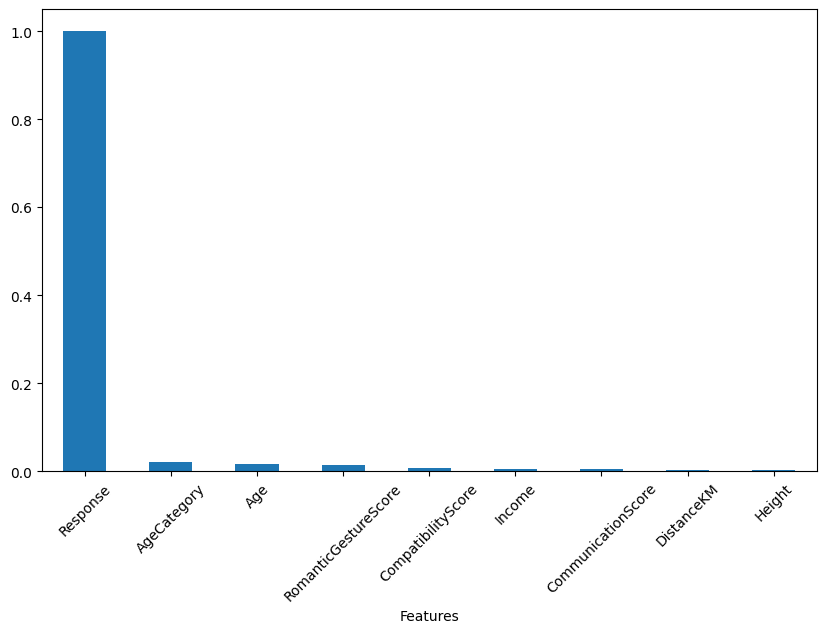

In [7]:
# Compute Pearson correlation coefficients
correlation_with_Response = df.corr()['Response'].abs().sort_values(ascending=False)

# Plotting the correlation coefficients
plt.figure(figsize=(10, 6))
correlation_with_Response.plot(kind='bar')
plt.title('')
plt.xlabel('Features')
plt.ylabel('')
plt.xticks(rotation=45)
plt.show()


In [8]:

df.drop(columns=['AgeCategory'], inplace=True)
#df.drop(columns=['CompatibilityScore'], inplace=True)
#df.drop(columns=['RomanticGestureScore'], inplace=True)


In [9]:
print("dataset length :" ,len(df))
df.shape


dataset length : 10000


(10000, 8)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Height                10000 non-null  int64
 1   Age                   10000 non-null  int64
 2   Income                10000 non-null  int64
 3   RomanticGestureScore  10000 non-null  int64
 4   CompatibilityScore    10000 non-null  int64
 5   CommunicationScore    10000 non-null  int64
 6   DistanceKM            10000 non-null  int64
 7   Response              10000 non-null  int64
dtypes: int64(8)
memory usage: 625.1 KB


In [11]:
# Identify duplicate rows (all columns)
duplicates = df.duplicated()
# Optionally,keep only the first instance of duplicates
data = df[~duplicates] 
# Print the DataFrame without duplicates
print(duplicates)
df = df.drop_duplicates()

df

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool


,Height,Age,Income,RomanticGestureScore,CompatibilityScore,CommunicationScore,DistanceKM,Response
0,156,59,7977,3,1,1,45,1
1,169,32,5842,0,1,5,46,1
2,178,42,17638,2,5,5,13,0
3,164,78,8793,0,0,7,52,0
4,160,35,15262,6,0,0,9,1
...,...,...,...,...,...,...,...,...
9995,162,76,12311,4,1,5,75,1
9996,162,75,6459,7,9,0,52,1
9997,166,70,9231,9,4,6,33,0
9998,176,78,12656,8,9,5,25,1


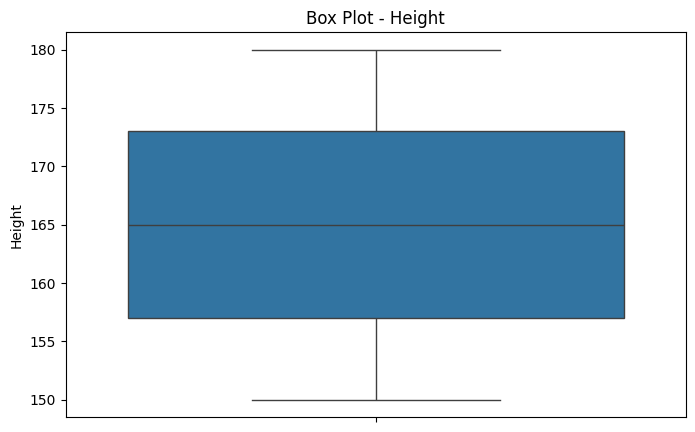

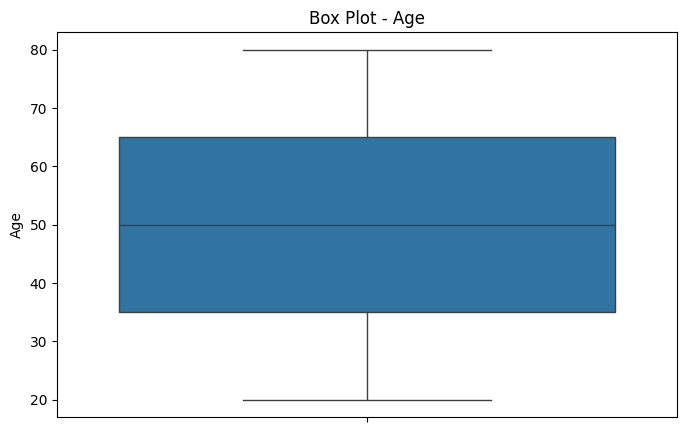

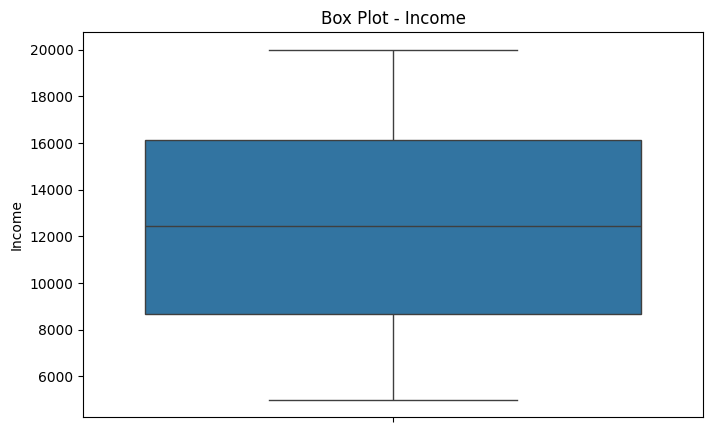

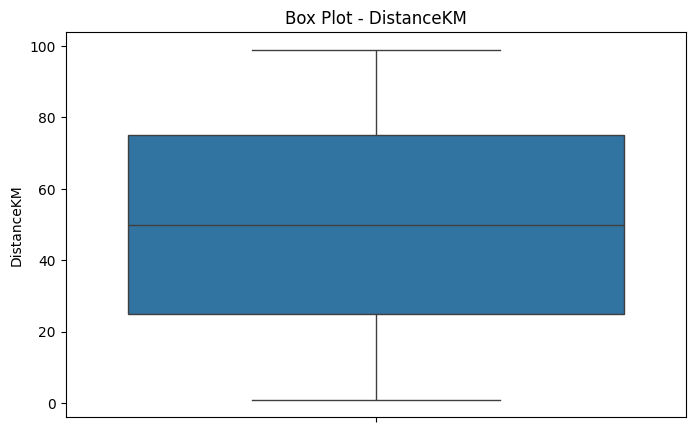

In [12]:
# Define numeric columns
numeric_columns = ['Height','Age', 'Income','DistanceKM']
# Function to visualize data distribution using box plots
def visualize_boxplot(df, columns):
    for col in columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(y=df[col])
        plt.title('Box Plot - ' + col)
        plt.ylabel(col)
        plt.show()

# Visualize data distribution using box plots before handling outliers
visualize_boxplot(df, numeric_columns)


In [13]:

from sklearn.preprocessing import MinMaxScaler
 #Intializing a scaler to scale our numreic data
scaler = MinMaxScaler()
# Scaling our numeric data
df['Height']=scaler.fit_transform(df[['Height']])
df['Age']=scaler.fit_transform(df[['Age']])
df['Income']=scaler.fit_transform(df[['Income']])
df['RomanticGestureScore']=scaler.fit_transform(df[['RomanticGestureScore']])
df['CompatibilityScore']=scaler.fit_transform(df[['CompatibilityScore']])
df['CommunicationScore']=scaler.fit_transform(df[['CommunicationScore']])
df['DistanceKM']=scaler.fit_transform(df[['DistanceKM']])

# displaying the dataset after scaling numeric data
df.head()


,Height,Age,Income,RomanticGestureScore,CompatibilityScore,CommunicationScore,DistanceKM,Response
0,0.200000,0.650000,0.198480,0.3,0.111111,0.111111,0.448980,1
1,0.633333,0.200000,0.056137,0.0,0.111111,0.555556,0.459184,1
2,0.933333,0.366667,0.842590,0.2,0.555556,0.555556,0.122449,0
3,0.466667,0.966667,0.252884,0.0,0.000000,0.777778,0.520408,0
4,0.333333,0.250000,0.684179,0.6,0.000000,0.000000,0.081633,1


In [14]:
X = df.drop(columns=['Response'], axis=1)
y = df[['Response']]

X.shape, y.shape

((10000, 7), (10000, 1))

In [15]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape , X_test.shape, y_test.shape


((8000, 7), (8000, 1), (2000, 7), (2000, 1))

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter ranges
hyperparameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

best_accuracy = 0
best_params = {}

# Iterate through all hyperparameter combinations
for criterion in hyperparameters['criterion']:
    for splitter in hyperparameters['splitter']:
        for max_depth in hyperparameters['max_depth']:
            for min_samples_split in hyperparameters['min_samples_split']:
                for min_samples_leaf in hyperparameters['min_samples_leaf']:
                    # Create and train the Decision Tree Classifier
                    dt = DecisionTreeClassifier(criterion=criterion,
                                                splitter=splitter,
                                                max_depth=max_depth,
                                                min_samples_split=min_samples_split,
                                                min_samples_leaf=min_samples_leaf,
                                                random_state=42)
                    dt.fit(X_train, y_train)

                    # Make predictions and calculate accuracy
                    y_pred = dt.predict(X_test)
                    accuracy = accuracy_score(y_test, y_pred)

                    # Update best parameters if a better accuracy is found
                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_params = {'criterion': criterion,
                                       'splitter': splitter,
                                       'max_depth': max_depth,
                                       'min_samples_split': min_samples_split,
                                       'min_samples_leaf': min_samples_leaf}

# Print the best hyperparameters and accuracy
print(f"Best hyperparameters: {best_params}")
print(f"Best accuracy: {best_accuracy:.2f}")


Best hyperparameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 6}
Best accuracy: 0.54


In [23]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy' ,max_depth= 10, min_samples_split=2, min_samples_leaf=6,random_state=42,splitter='best') 

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test-set labels
y_pred = dt.predict(X_test)

# Evaluate test-set accuracy
test_accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy for Test Set:", test_accuracy)

# Predict train-set labels
y_pred_train = dt.predict(X_train)

# Evaluate train-set accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)*100

# Print the accuracy for the training set
print("Accuracy for Train Set:", train_accuracy)

Accuracy for Test Set: 54.0
Accuracy for Train Set: 59.650000000000006


In [26]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with folds
cv_scores = cross_val_score(dt, X_train, y_train, cv=4)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
print("Mean Cross-Validation Score:", cv_scores.mean())
print("Standard Deviation of Cross-Validation Scores:", cv_scores.std())


Cross-Validation Scores: [0.4955 0.521  0.5075 0.494 ]
Mean Cross-Validation Score: 0.5045
Standard Deviation of Cross-Validation Scores: 0.010868532559642085


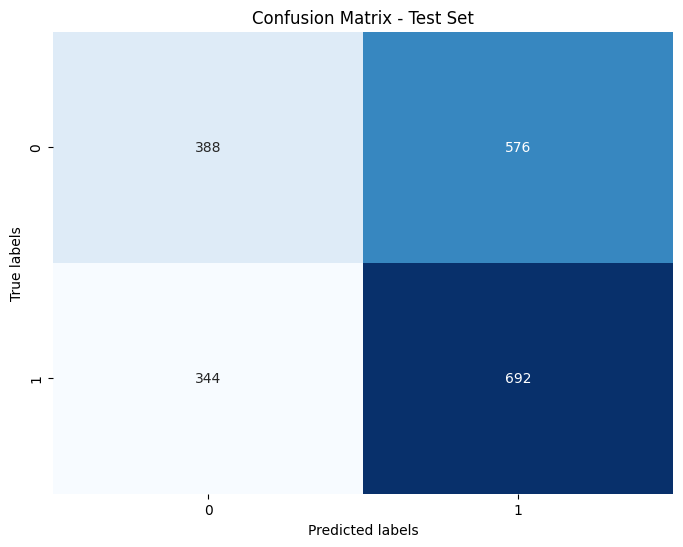

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for test set
conf_matrix_test = confusion_matrix(y_test, y_pred)

# Plot confusion matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Test Set')
plt.show()


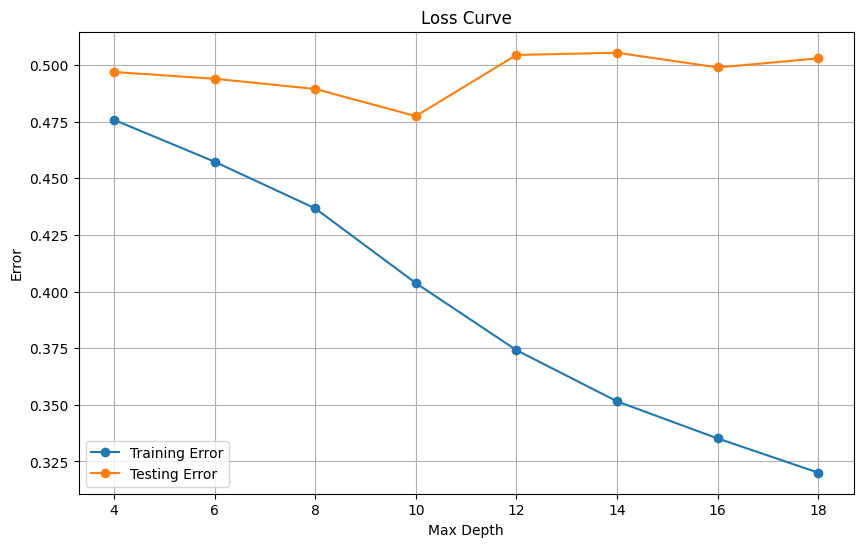

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define hyperparameter values
max_depth_values = [4,6,8,10, 12, 14, 16, 18]
train_errors = []
test_errors = []

# Iterate over different hyperparameter values
for max_depth in max_depth_values:
    # Create Decision Tree Classifier with current hyperparameters
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, min_samples_split=2, min_samples_leaf=15, random_state=42)
    
    # Fit dt to the training set
    dt.fit(X_train, y_train)

    # Predict train-set labels
    y_pred_train = dt.predict(X_train)

    # Predict test-set labels
    y_pred_test = dt.predict(X_test)

    # Calculate training error
    train_error = 1 - accuracy_score(y_train, y_pred_train)

    # Calculate testing error
    test_error = 1 - accuracy_score(y_test, y_pred_test)

    # Append errors to lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_errors, marker='o', label='Training Error')
plt.plot(max_depth_values, test_errors, marker='o', label='Testing Error')
plt.title('Loss Curve')
plt.xlabel('Max Depth')
plt.ylabel('Error')
plt.xticks(max_depth_values)
plt.legend()
plt.grid(True)
plt.show()
